In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib import rcParams

In [6]:
rcParams['figure.dpi']=600

In [7]:
df = pd.read_csv('../result/human_volume_FR_nomenclature.tsv',sep='\t',index_col=0)

In [9]:
df

,Species,nm_volume,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,max_path_distance,neuron_reconstruction_type,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,overall_depth,overall_height,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,vaa3d_volume,line_name,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,nr__reconstruction_type,nrwkf__id,erwkf__id,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,...,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest,si__height,si__width,si__path,csl__x,csl__y,csl__z,csl__normalized_depth,cell_reporter_status,m__glif,m__biophys,m__biophys_perisomatic,m__biophys_all_active,tag__apical,tag__dendrite_type,morph_thumb_path,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name,e-type,m-type,me-type,upright_angle,soma_distance_from_pia,estimated_shrinkage_factor,estimated_slice_angle,cell_set_preferred_alias,cell_set_ label,cell_set_ accession,cell_set_ aligned_alias,cell_set_ additional_alias,cell_set_ alias_assignee,cell_set_ alias_citation,cell_set_ structure,cell_set_ ontology_tag,taxonomy_id,species,modality
488386504,Human,4337.309143,83.285868,NaN,0.908488,0.187571,90.031250,0.890005,NaN,623320232,3.0,306.285230,315.520990,full,16,38,3000,6,22,64.9729,551.043324,374.413198,0.1144,0.1144,0.28,65.904111,False,3D Neuron Reconstruction morphology,3462.933474,2037.560137,107.626504,NaN,H15.06.016.01.12.01,right,12117,"""inferior frontal gyrus""",IFG,12117,IFG,3,306.285230,6.0,16.0,0.908488,0.890005,full,623320234.0,618225494,-68.250000,1.159574,...,7.073253,4.666667,214.285714,111.093789,9.413227,-82.766602,9444.0,9447.0,/external/humancelltypes/prod6/specimen_488386...,308.0,310.0,185.0,0.251463,NaN,2,0,0,0,NaN,aspiny,/api/v2/well_known_file_download/606633300,/api/v2/well_known_file_download/488388593,/api/v2/well_known_file_download/500862657,27 yrs,Female,tumor,White or Caucasian,0.0,Homo Sapiens,486909083,H15.06.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488386626,Human,4086.747560,71.934852,NaN,0.926564,0.482867,85.607143,0.931743,NaN,669287805,5.0,316.385622,362.370411,full,15,34,2430,4,19,69.7698,442.578166,324.459967,0.1144,0.1144,0.28,609.960522,False,3D Neuron Reconstruction morphology,2818.027682,4289.961763,547.046601,NaN,H15.06.016.01.03.02,right,12117,"""inferior frontal gyrus""",IFG,12117,IFG,3,316.385622,4.0,15.0,0.926564,0.931743,full,669287807.0,618224815,-62.187504,1.281448,...,5.698774,5.760000,173.611111,87.207027,14.614110,-64.986038,9447.0,9426.0,/external/humancelltypes/prod17/specimen_48838...,308.0,310.0,185.0,0.379775,NaN,0,0,0,0,NaN,aspiny,/api/v2/well_known_file_download/606633395,/api/v2/well_known_file_download/488390619,/api/v2/well_known_file_download/500862652,27 yrs,Female,tumor,White or Caucasian,0.0,Homo Sapiens,486909083,H15.06.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488418027,Human,4460.977078,73.487240,NaN,0.872039,0.533630,130.360000,1.000000,NaN,669814886,3.0,471.341628,480.836394,full,13,31,3419,5,18,38.8729,756.613518,247.884509,0.1144,0.1144,0.28,389.407012,False,3D Neuron Reconstruction morphology,3926.692412,6583.241053,904.463395,NaN,H15.06.017.03.03.01,right,12141,"""middle temporal gyrus""",MTG,12141,MTG,3,471.341628,5.0,13.0,0.872039,1.000000,full,669814888.0,616980549,-63.406250,1.524543,...,11.016552,9.030000,110.741971,141.249970

In [33]:
df.dropna(axis=1).columns

Index(['Species', 'nm_volume', 'average_bifurcation_angle_local',
       'average_contraction', 'average_diameter', 'average_fragmentation',
       'average_parent_daughter_ratio', 'id', 'max_branch_order',
       'max_euclidean_distance', 'max_path_distance',
       'neuron_reconstruction_type', 'number_bifurcations', 'number_branches',
       'number_nodes', 'number_stems', 'number_tips', 'overall_depth',
       'overall_height', 'overall_width', 'scale_factor_x', 'scale_factor_y',
       'scale_factor_z', 'soma_surface', 'superseded', 'tags', 'total_length',
       'total_surface', 'vaa3d_volume', 'specimen__name',
       'specimen__hemisphere', 'structure__id', 'structure__name',
       'structure__acronym', 'structure_parent__id',
       'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'n

In [12]:
# Usually spiny neurons are assumed to be excitatory while aspiny and sparsely spiny neurons are assumed to be inhibitory
df['tag__dendrite_type'].value_counts()

spiny             100
aspiny             37
sparsely spiny      9
Name: tag__dendrite_type, dtype: int64

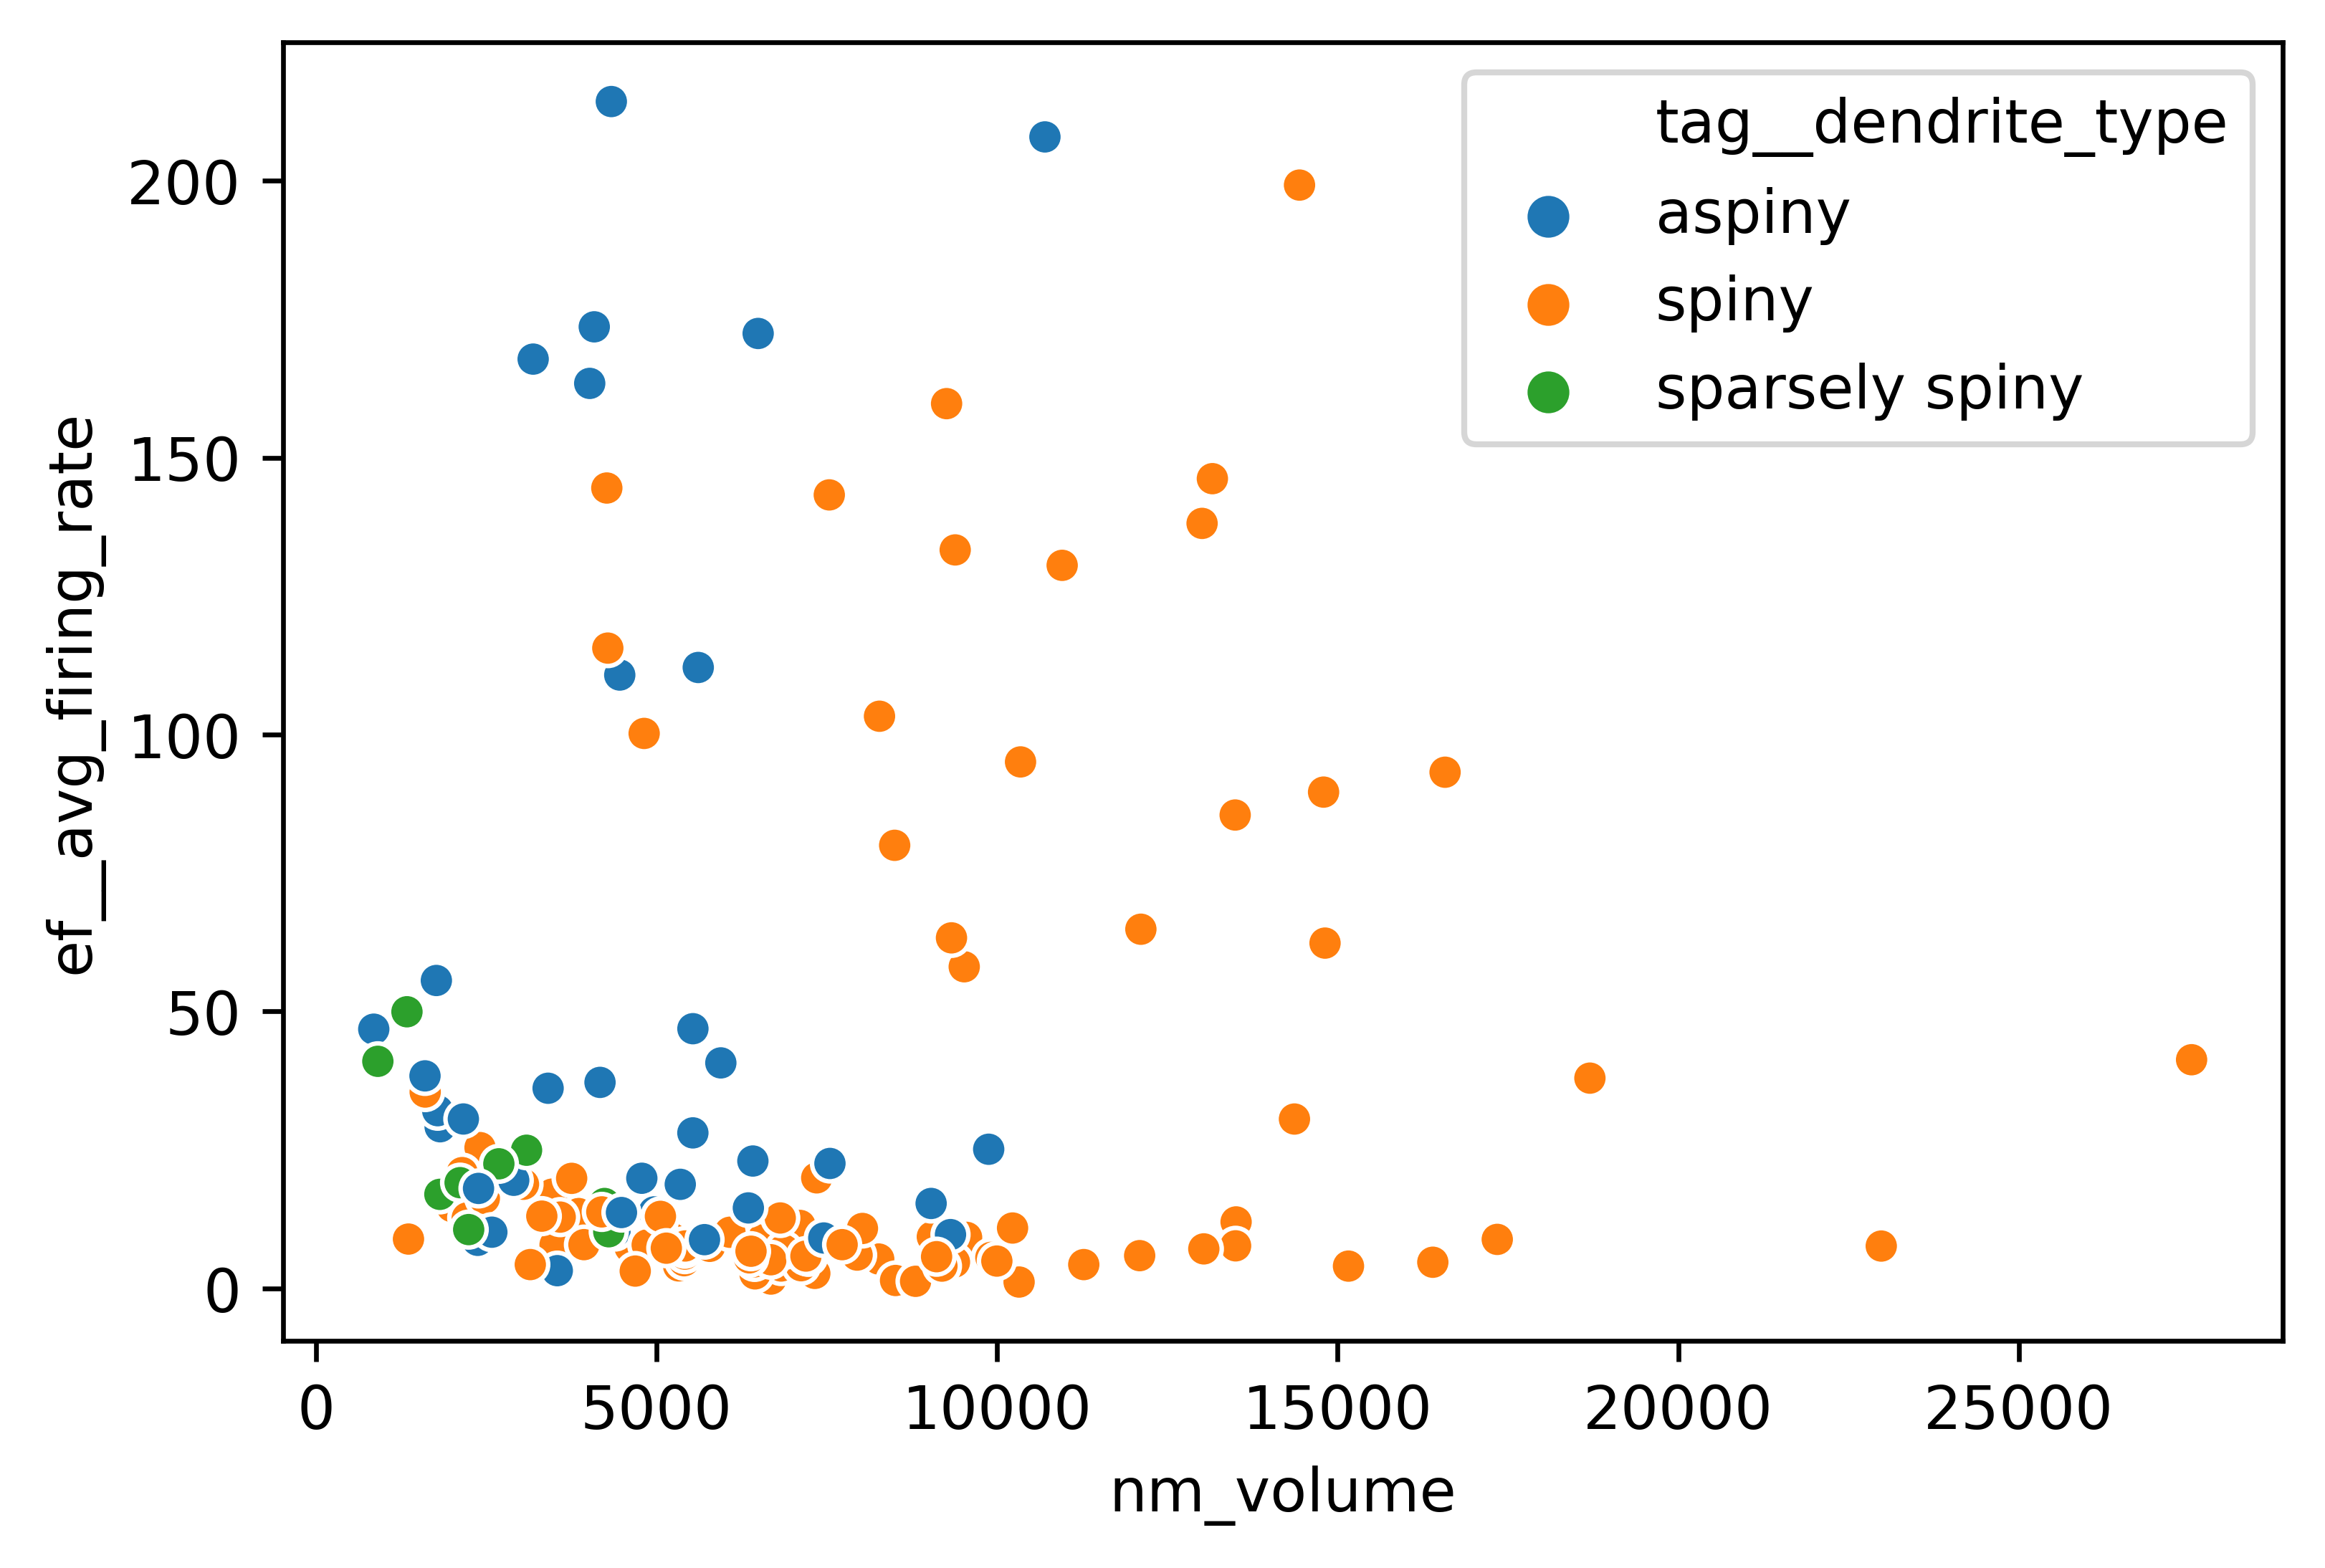

In [13]:
sns.scatterplot(data=df,x='nm_volume',y='ef__avg_firing_rate', hue='tag__dendrite_type')

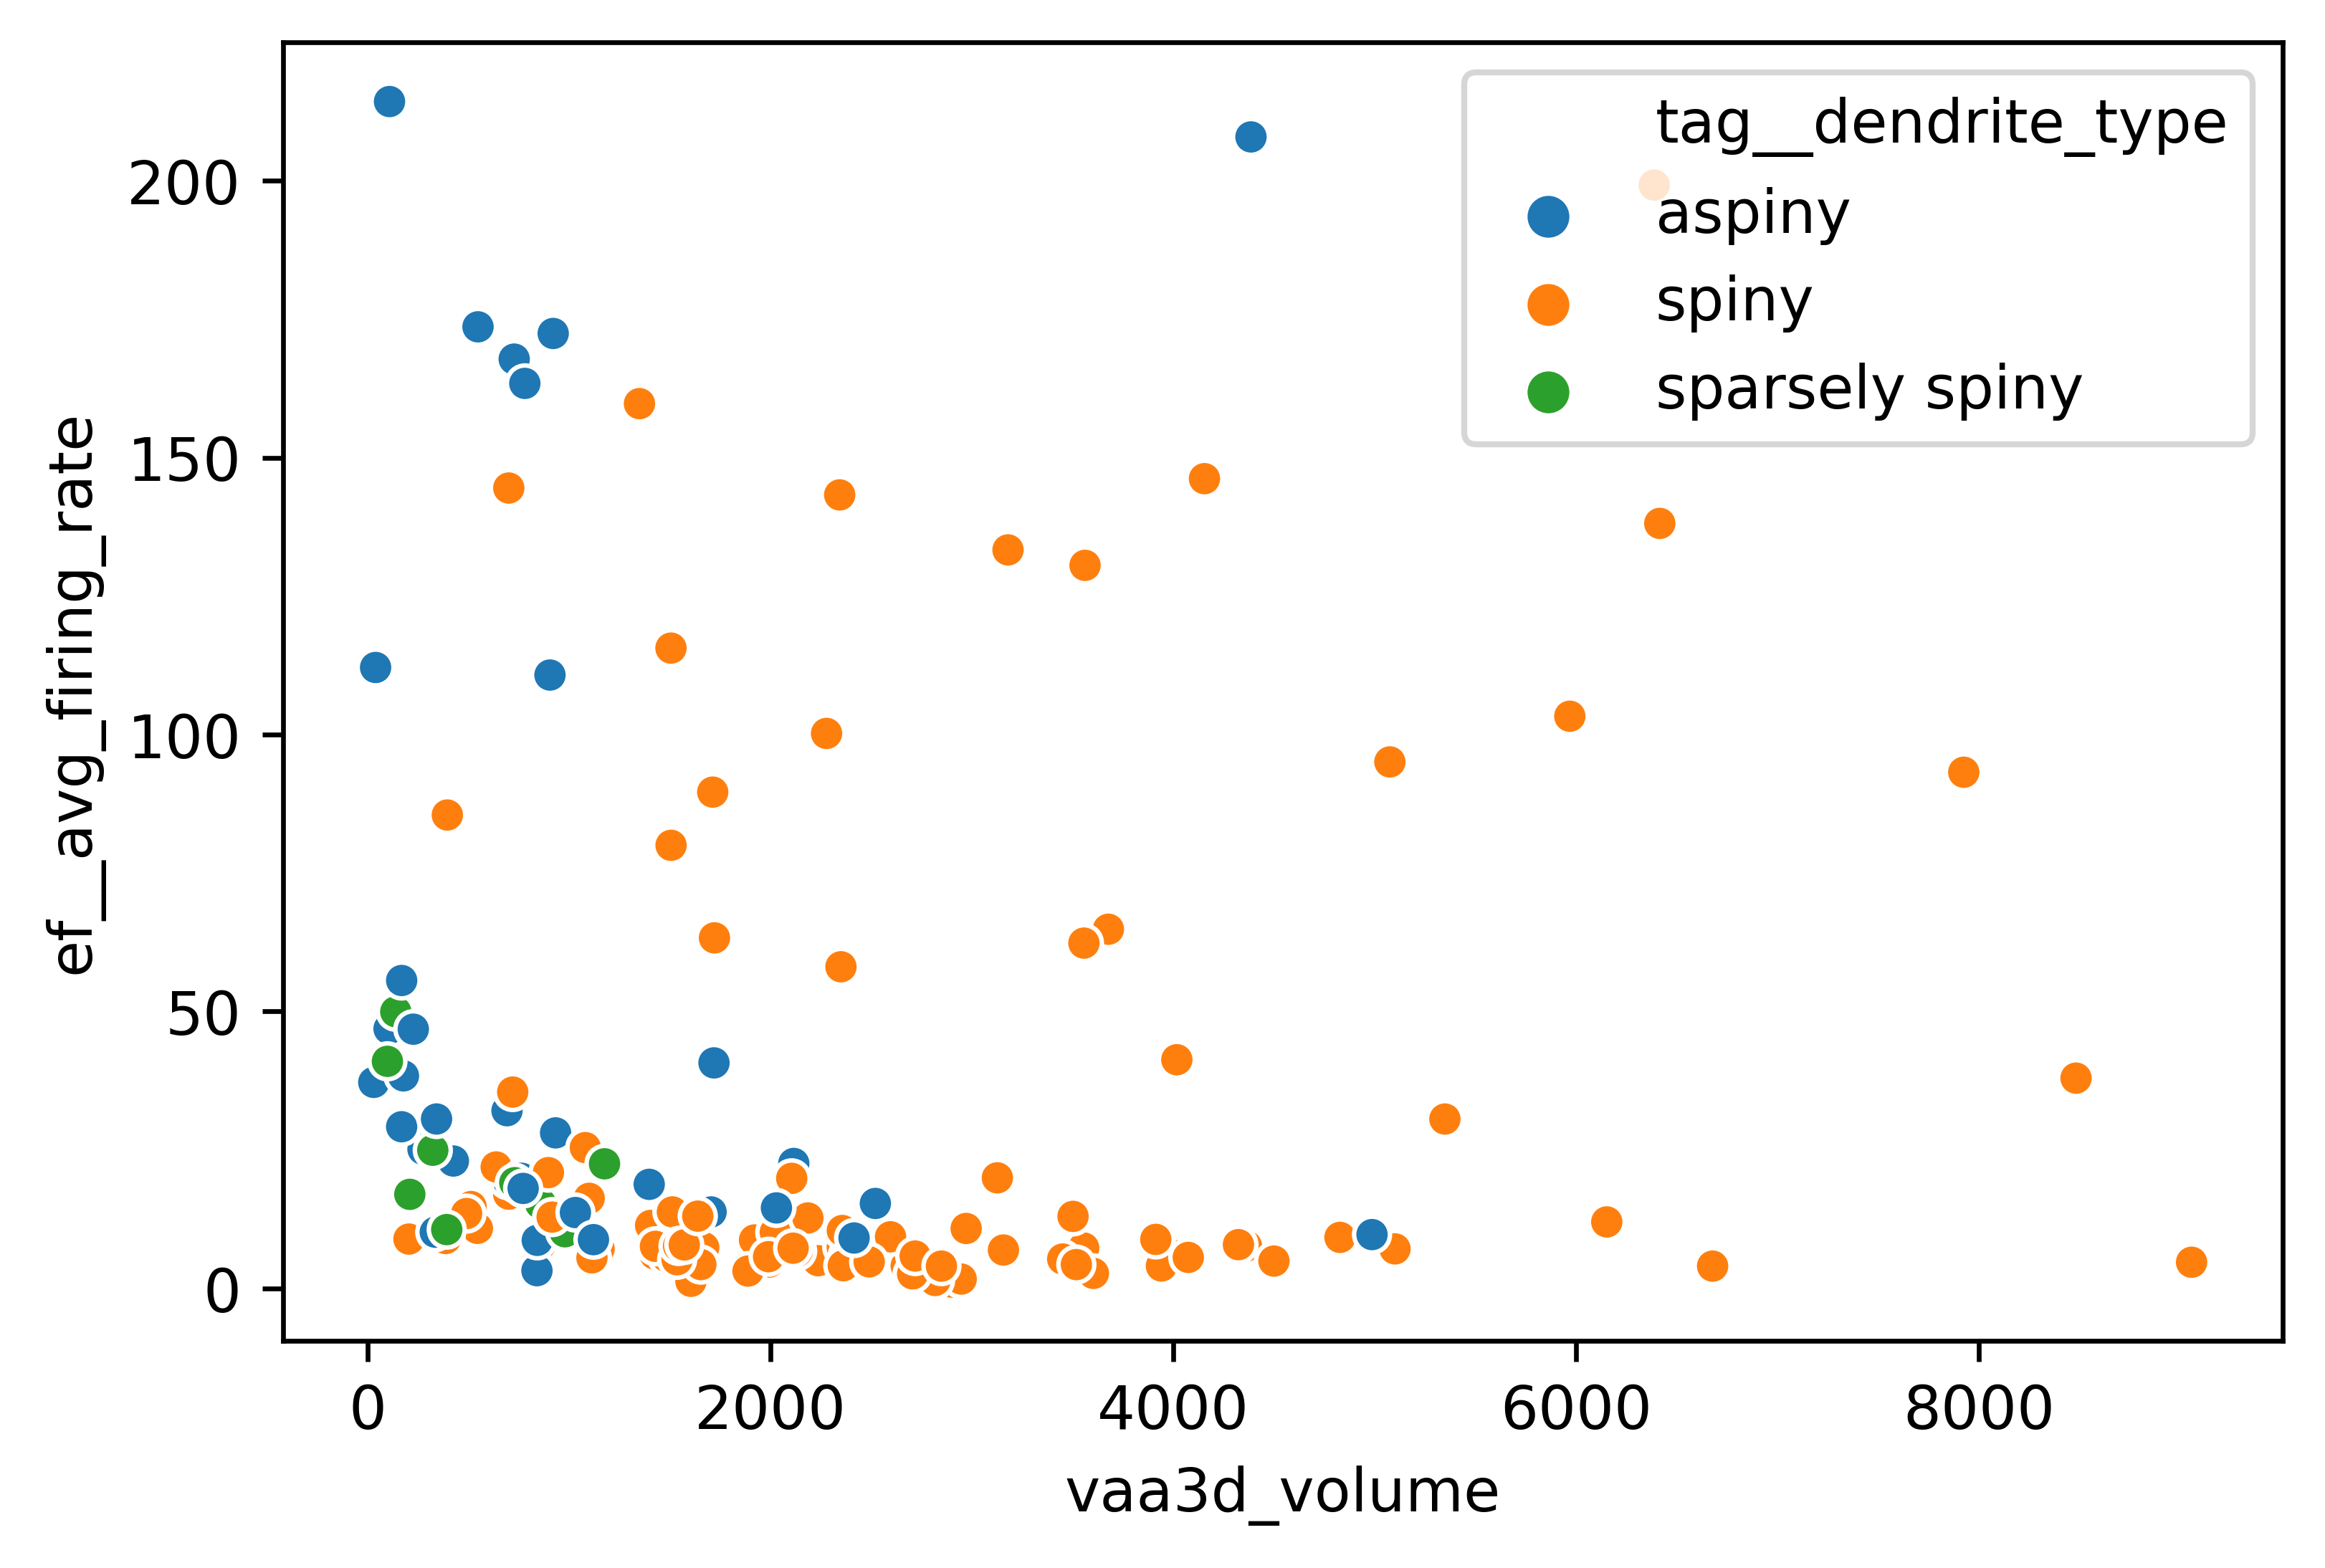

In [14]:
sns.scatterplot(data=df,x='vaa3d_volume',y='ef__avg_firing_rate', hue='tag__dendrite_type')

In [19]:
exc_df = df[df['tag__dendrite_type']=='spiny']
inh_df = df[df['tag__dendrite_type']!='spiny']

In [20]:
import pingouin as pg

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [21]:
pg.corr(df['nm_volume'],df['ef__avg_firing_rate'])
pg.corr(df['vaa3d_volume'],df['ef__avg_firing_rate'])
pg.corr(exc_df['nm_volume'],exc_df['ef__avg_firing_rate'])
pg.corr(exc_df['vaa3d_volume'],exc_df['ef__avg_firing_rate'])
pg.corr(inh_df['nm_volume'],inh_df['ef__avg_firing_rate'])
pg.corr(inh_df['vaa3d_volume'],inh_df['ef__avg_firing_rate'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,0.123294,"[-0.04, 0.28]",0.015201,0.001428,0.138174,0.307,0.31807


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,0.050169,"[-0.11, 0.21]",0.002517,-0.011434,0.5476,0.124,0.092352


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.248234,"[0.05, 0.42]",0.06162,0.042272,0.012766,2.654,0.708157


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.201448,"[0.01, 0.38]",0.040581,0.0208,0.044451,0.915,0.524052


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,46,0.153055,"[-0.14, 0.42]",0.023426,-0.021996,0.309869,0.303,0.174987


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,46,0.004717,"[-0.29, 0.29]",0.000022,-0.046488,0.975183,0.184,0.049771


In [22]:
exc_log_df = pd.DataFrame()

In [23]:
exc_log_df['log_nm_volume']=np.log10(exc_df['nm_volume'])

In [24]:
exc_log_df['log_vaa3d_volume']=np.log10(exc_df['vaa3d_volume'])

In [26]:
exc_log_df['ef__avg_firing_rate']=exc_df['ef__avg_firing_rate']

In [28]:
exc_log_df['log_FR']=np.log10(exc_df['ef__avg_firing_rate'])

In [30]:
# Looking at just excitatory cells' volume, FR and log transformation
pg.corr(exc_df['nm_volume'],exc_df['ef__avg_firing_rate'])
pg.corr(exc_df['vaa3d_volume'],exc_df['ef__avg_firing_rate'])
pg.corr(exc_log_df['log_nm_volume'],exc_log_df['ef__avg_firing_rate'])
pg.corr(exc_log_df['log_vaa3d_volume'],exc_log_df['ef__avg_firing_rate'])
pg.corr(exc_log_df['log_nm_volume'],exc_log_df['log_FR'])
pg.corr(exc_log_df['log_vaa3d_volume'],exc_log_df['log_FR'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.248234,"[0.05, 0.42]",0.06162,0.042272,0.012766,2.654,0.708157


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.201448,"[0.01, 0.38]",0.040581,0.0208,0.044451,0.915,0.524052


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.246446,"[0.05, 0.42]",0.060736,0.041369,0.013446,2.537,0.701655


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.140124,"[-0.06, 0.33]",0.019635,-0.000579,0.16438,0.324,0.286376


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.132922,"[-0.07, 0.32]",0.017668,-0.002586,0.18738,0.294,0.262316


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,100,0.024318,"[-0.17, 0.22]",0.000591,-0.020015,0.810206,0.129,0.056494


In [31]:
# For mouse cells, there were only 10 excitatory cells, so I wasn't able to group the cells. For human I can try

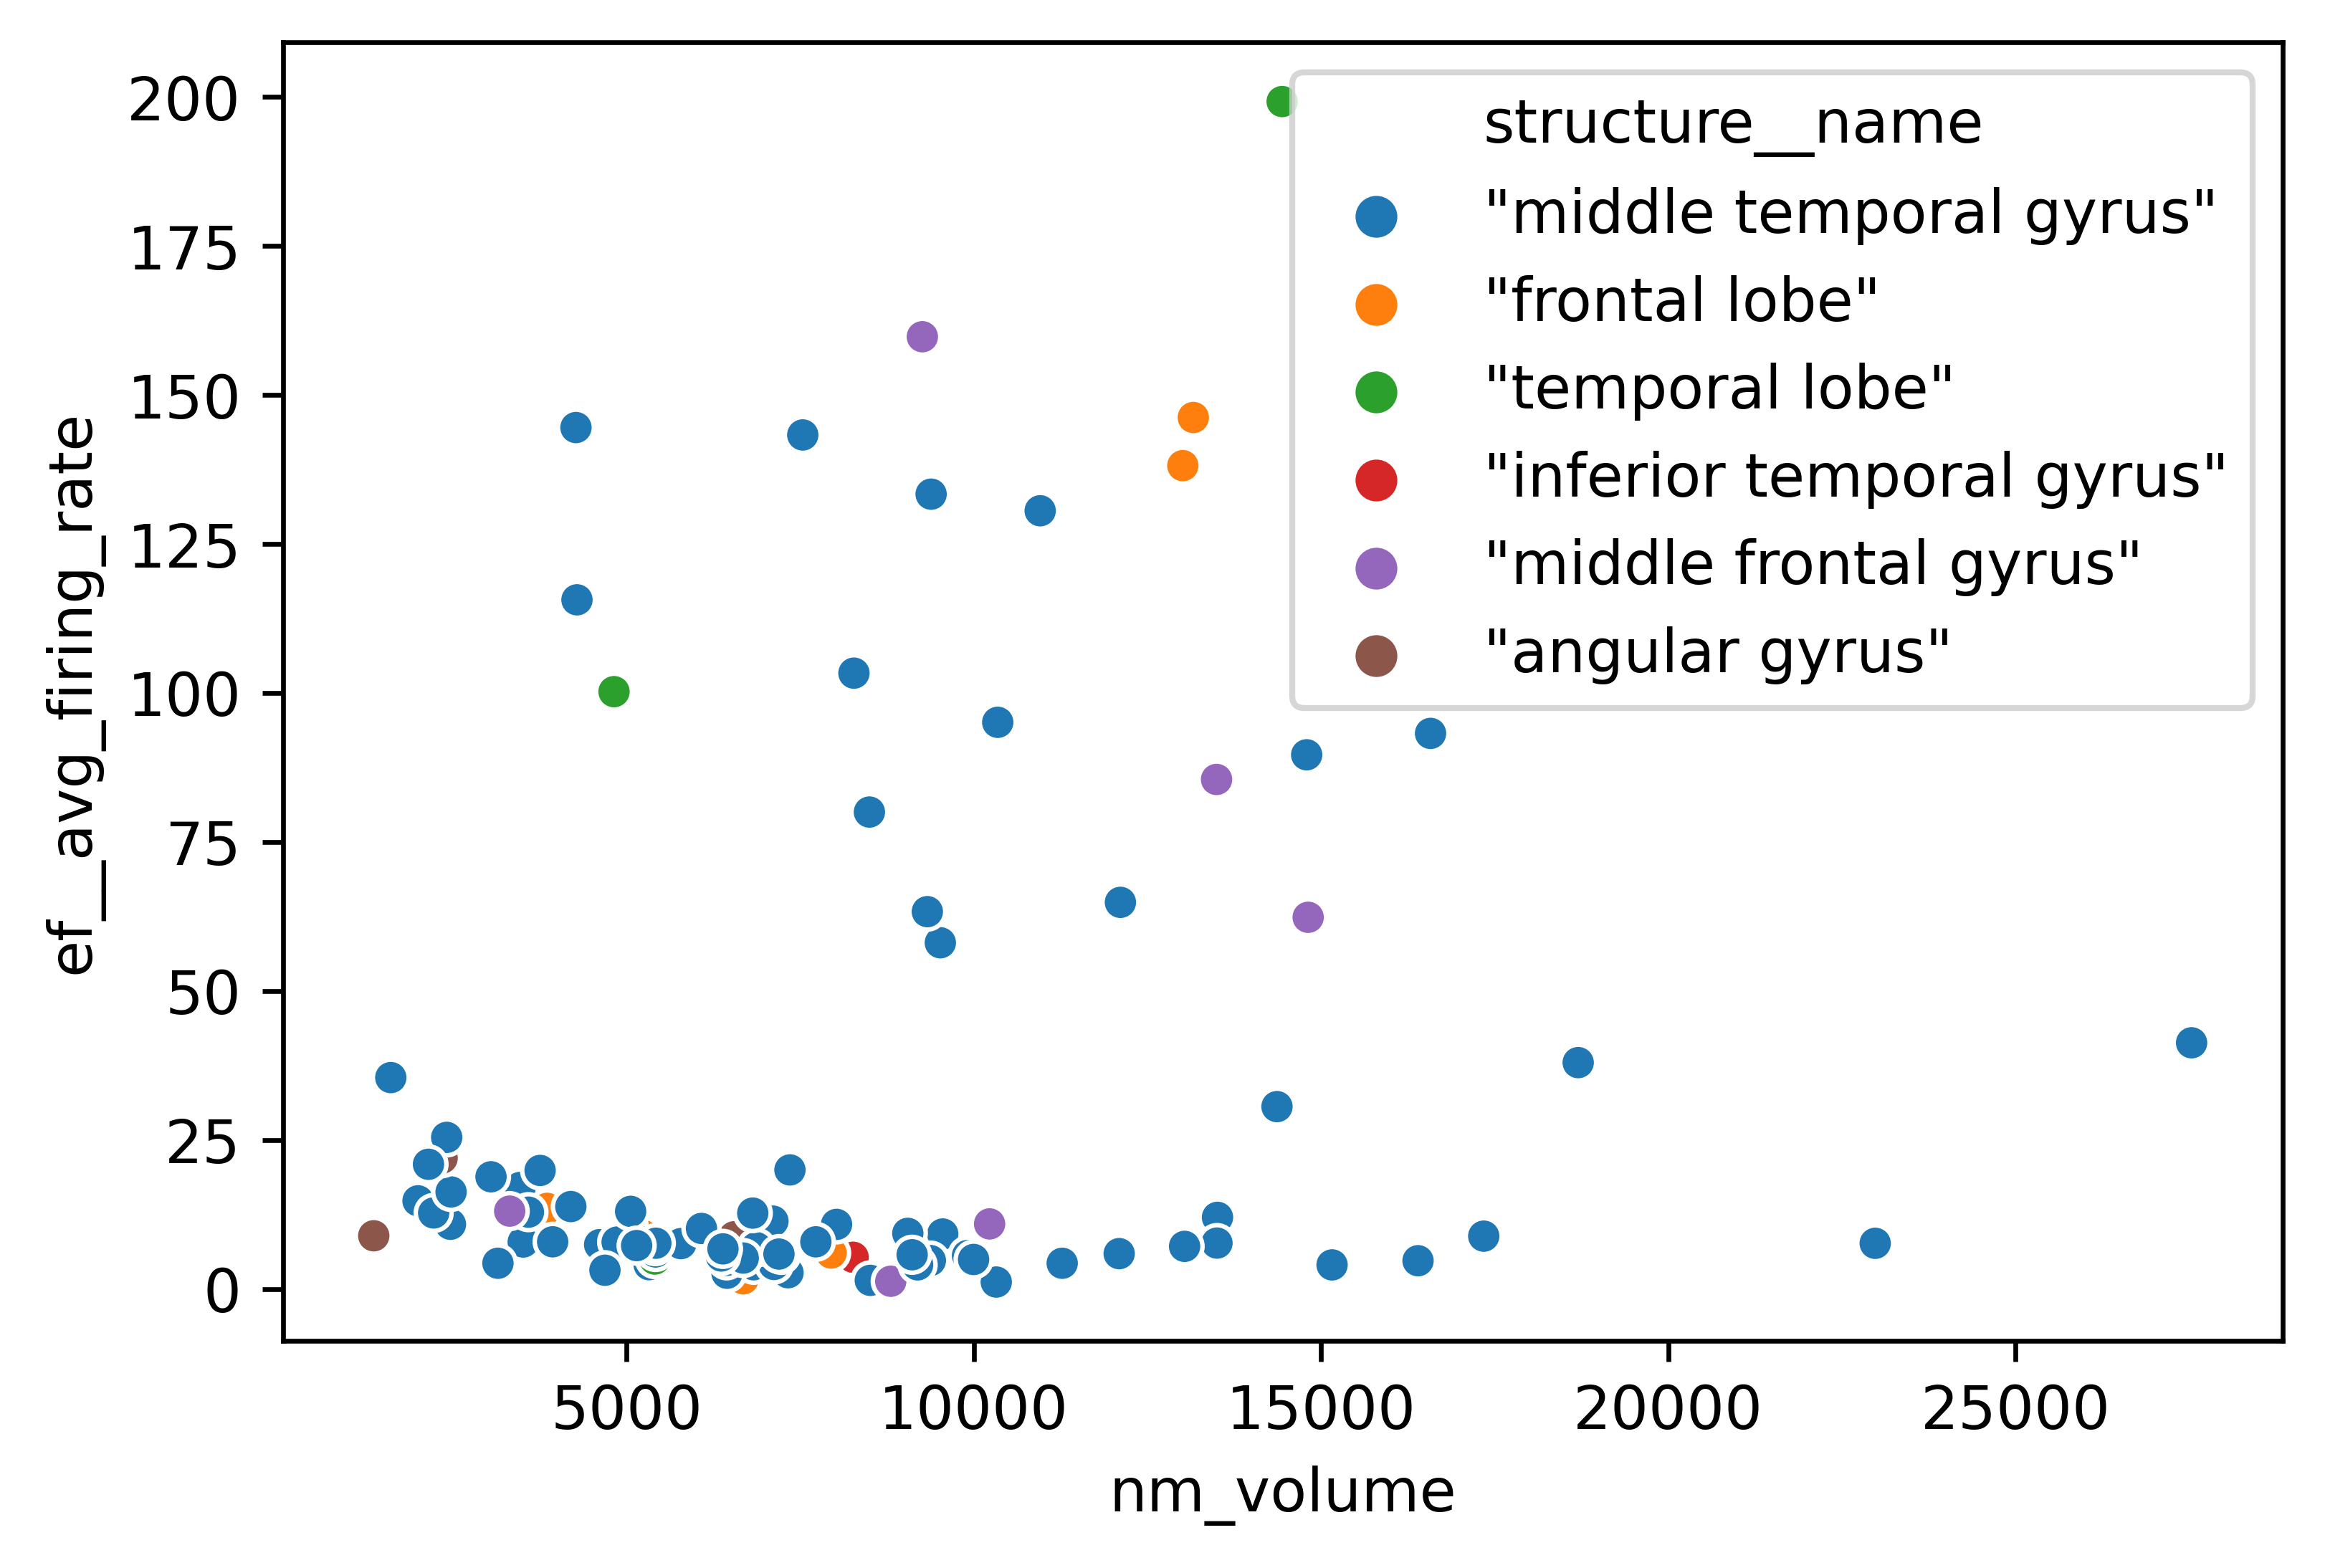

In [34]:
sns.scatterplot(data=exc_df,x='nm_volume',y='ef__avg_firing_rate',hue='structure__name')

In [57]:
exc_df['str_structure__layer']=exc_df['structure__layer'].apply(lambda x: 'L'+str(x))

<ipython-input-57-175e310981fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exc_df['str_structure__layer']=exc_df['structure__layer'].apply(lambda x: 'L'+str(x))


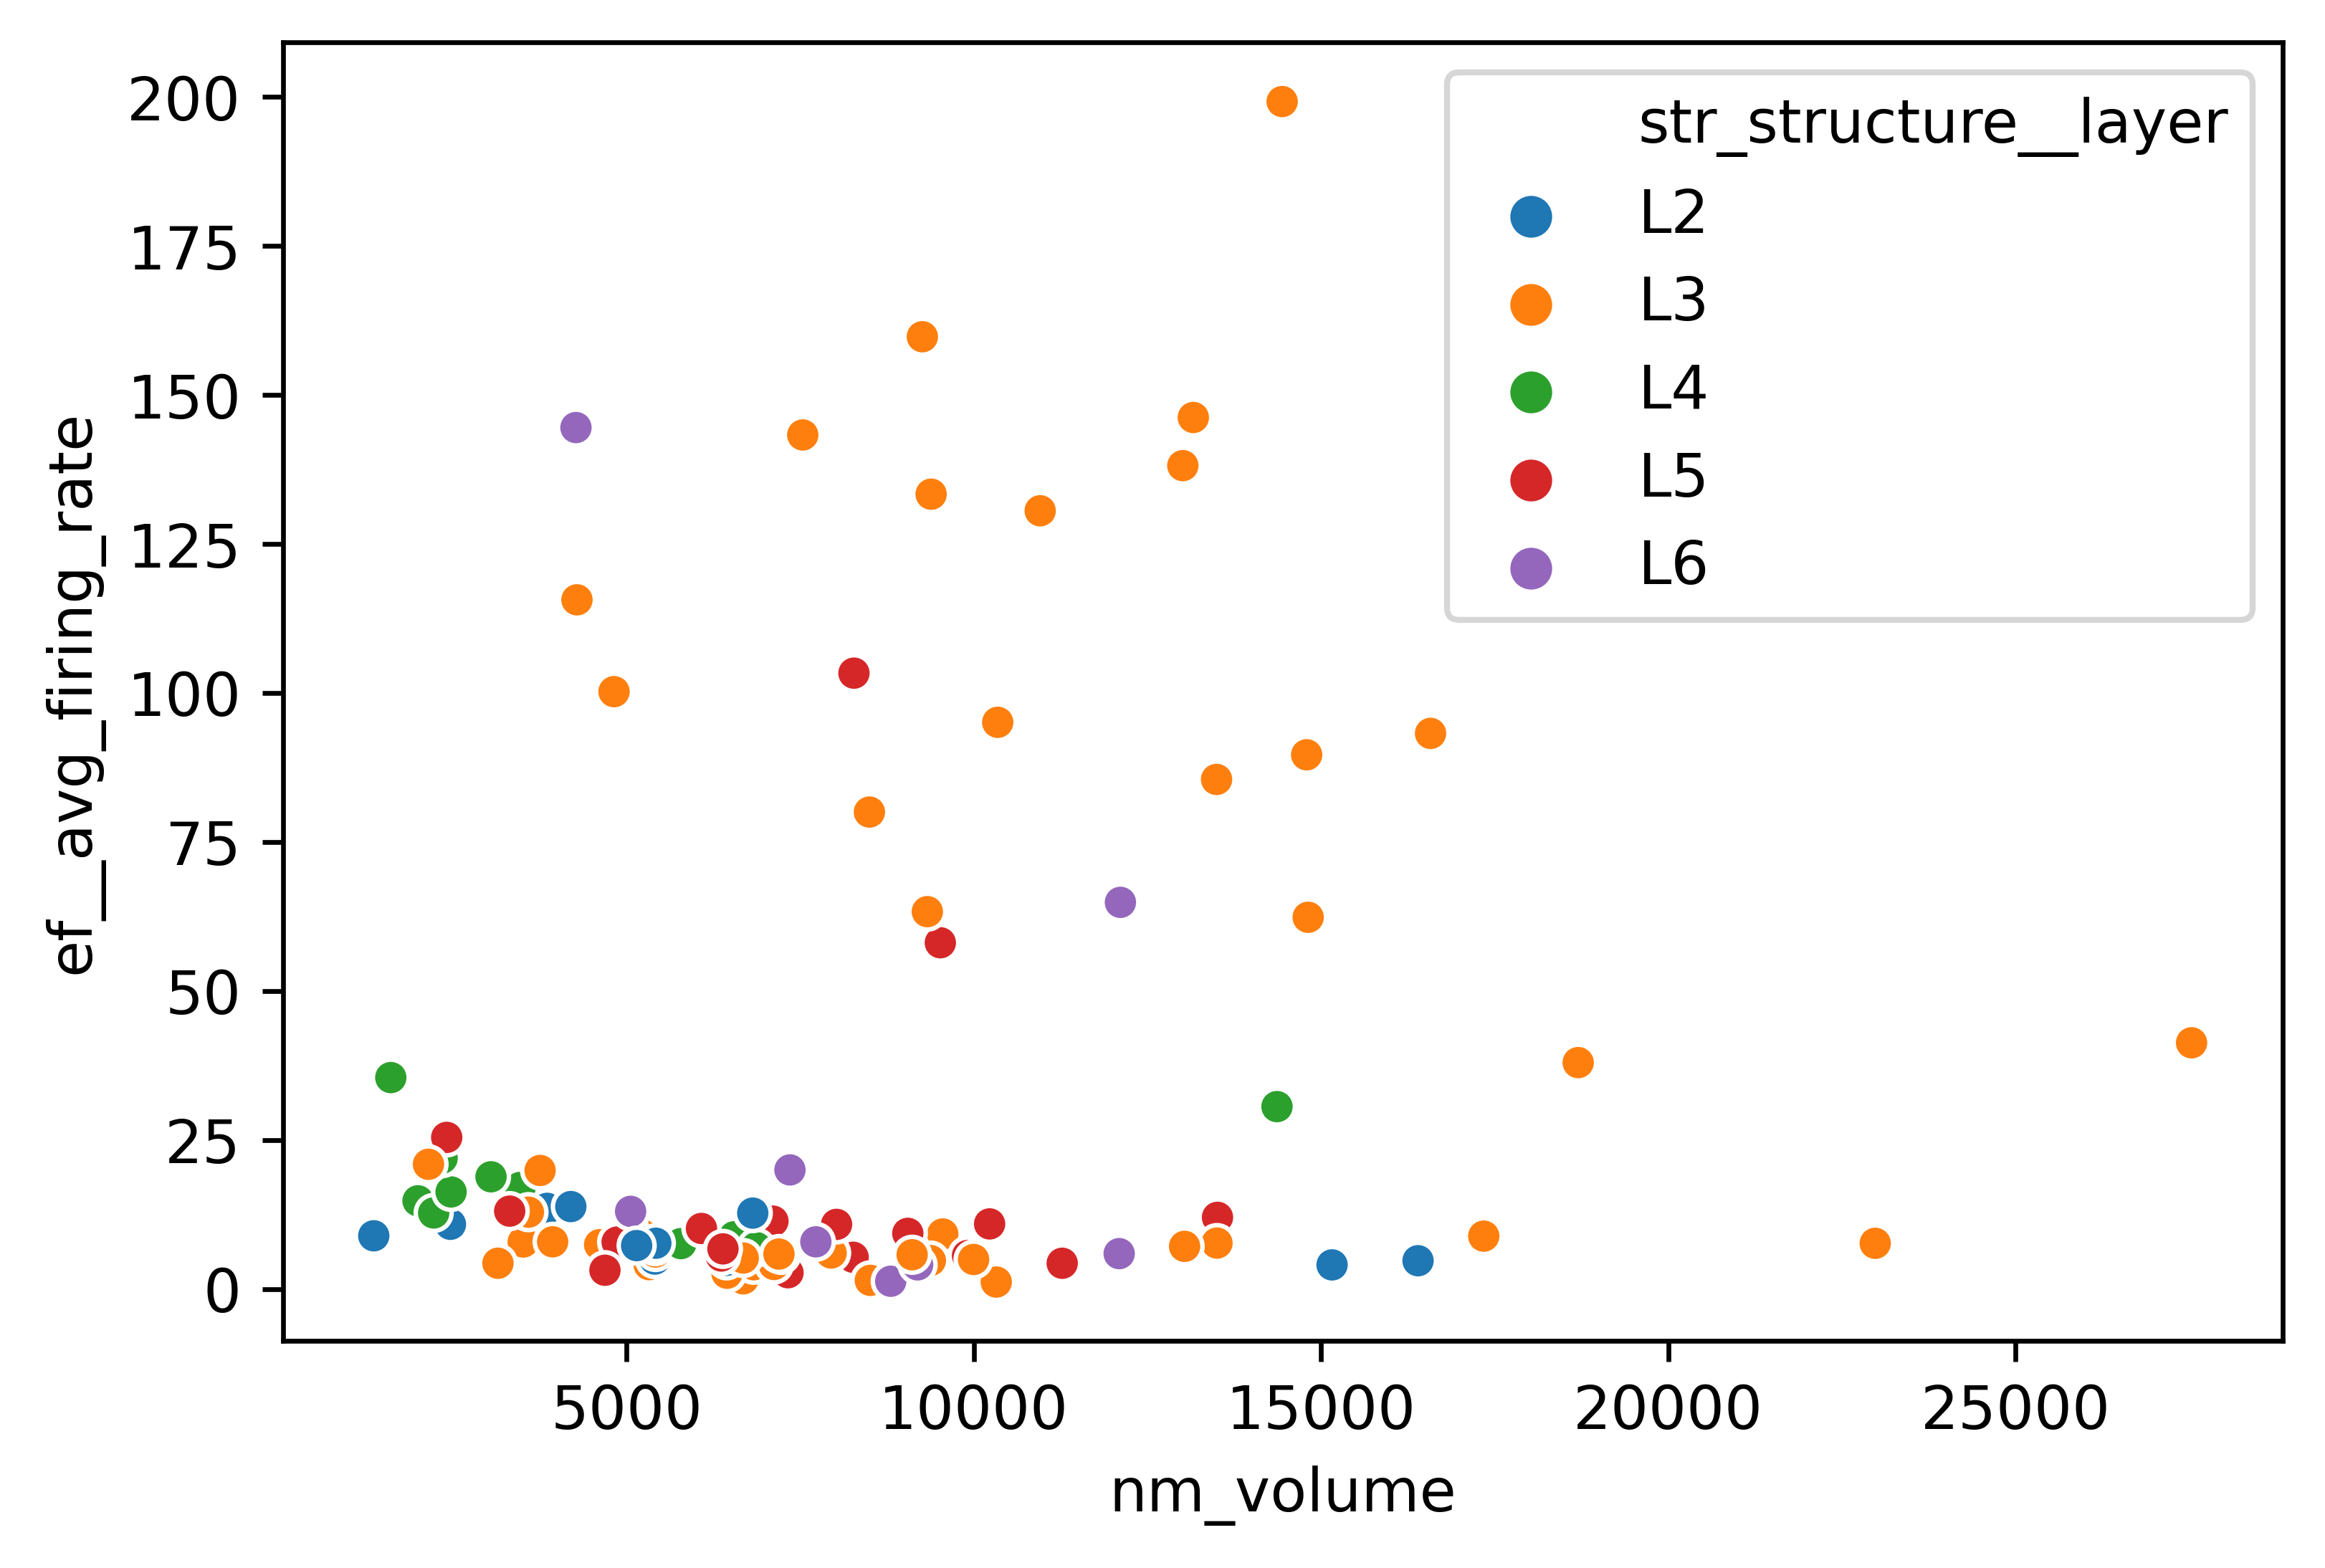

In [58]:
sns.scatterplot(data=exc_df,x='nm_volume',y='ef__avg_firing_rate',hue='str_structure__layer',hue_order=['L2','L3','L4','L5','L6'])

In [47]:
int(exc_df['donor__age'].iloc[0][0:-4])

37

In [50]:
exc_df['int_donor__age']=exc_df['donor__age'].apply(lambda x: int(x[0:-4]))

<ipython-input-50-7fd1e99158e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exc_df['int_donor__age']=exc_df['donor__age'].apply(lambda x: int(x[0:-4]))


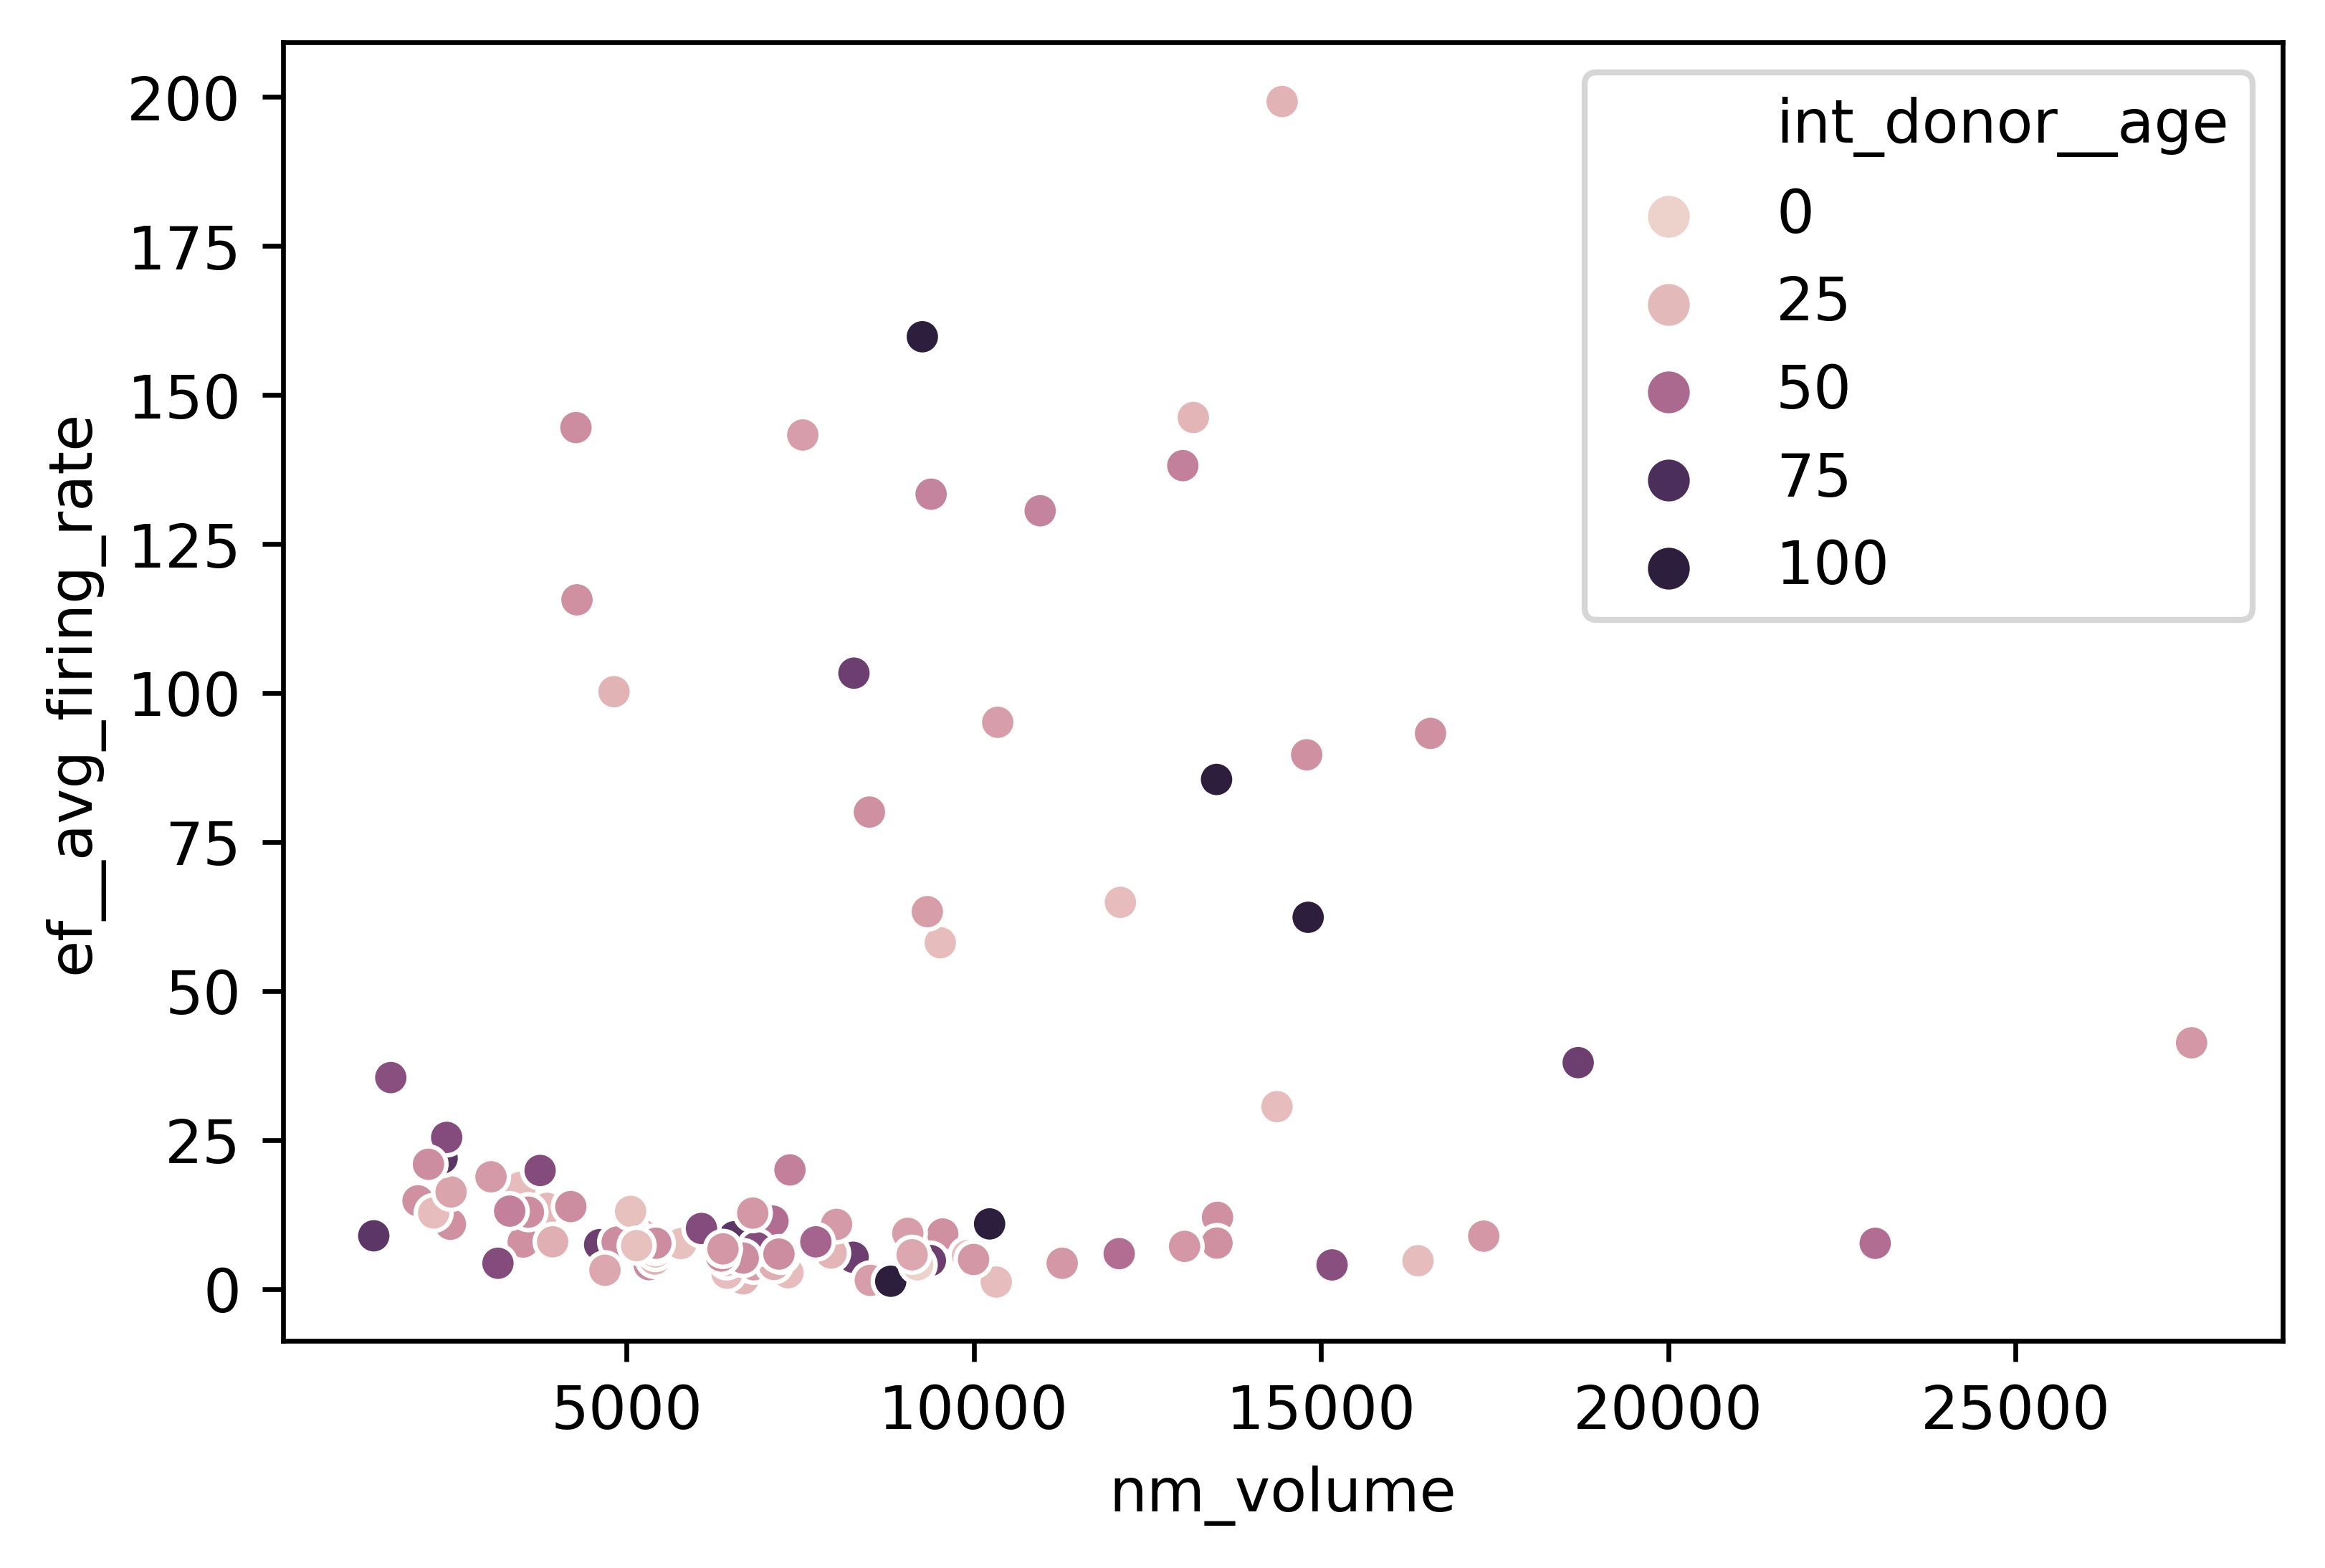

In [51]:
sns.scatterplot(data=exc_df,x='nm_volume',y='ef__avg_firing_rate',hue='int_donor__age')